Analisis Exploratorio de conjuntos de Datos reales

Dataset: Credit Card Fraud Detection
Link:https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


El archivo Credit Card Fraud Detection tiene 31 columnas y consta de 284807 transacciones.
Las columnas son:

Time: Caracteristica que representa el número de segundos transcurridos entre esta transacción y la primera transacción en el conjunto de datos

Amount: Caracteristica que representa el monto de la transaccion.

V1-V28:Son caracteristicas principales obtenidas a travez de PCA para mantener la confidencialidad sobre los datos.

Class: Variable tarjet que determina si una operacion fue fraudulenta o no(0=no fraudulento , 1=fraudulento)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
#Lectura de los datos del archivo csv
data = pd.read_csv('Data/creditcard.csv');

In [3]:
#Visualización de los datos
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Tipo de datos de las columnas del dataset
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Analisis de la variable Objetivo

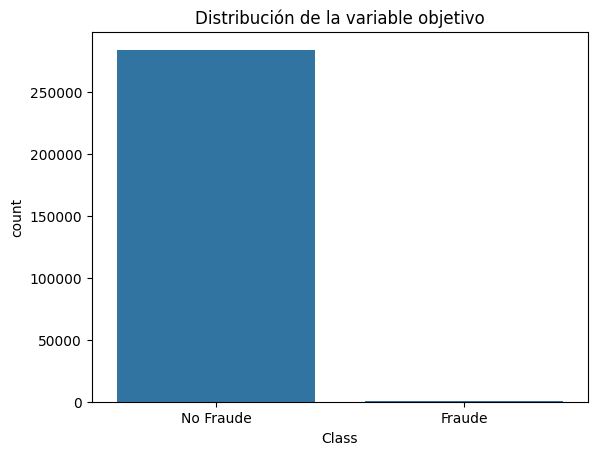

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [10]:
#Analisis de la variable objetivo (Class)
sns.countplot(x='Class', data=data)
plt.title('Distribución de la variable objetivo')
plt.xticks(ticks=[0, 1], labels=['No Fraude', 'Fraude'])
plt.show()

print(data['Class'].value_counts(normalize=True))

Analisis de las caracteristicas

In [5]:
#Estadisticas de las varibles Time y Amount que no fueron tratadas con PCA
print(data[['Time', 'Amount']].describe())

                Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000


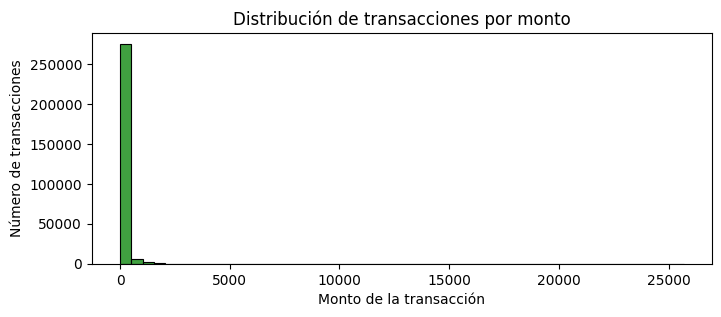

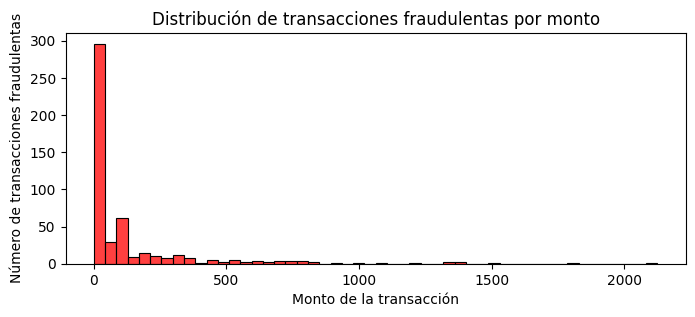

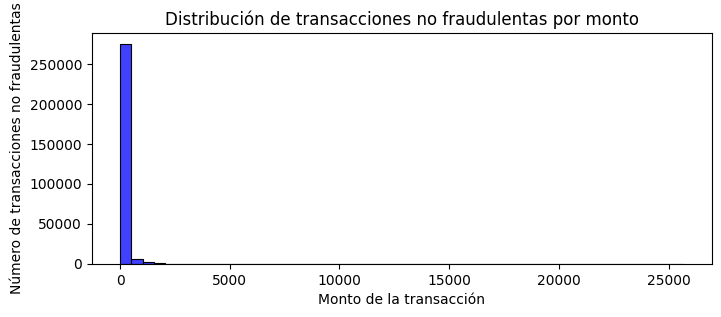

In [41]:
# Graficar el histograma de las transacciones por monto
plt.figure(figsize=(8, 3))
sns.histplot(data['Amount'], bins=50, kde=False, color='green')
plt.title('Distribución de transacciones por monto')
plt.xlabel('Monto de la transacción')
plt.ylabel('Número de transacciones')
plt.show()

# Graficar el histograma de las transacciones fraudulentas por monto
plt.figure(figsize=(8, 3))
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, kde=False, color='red')
plt.title('Distribución de transacciones fraudulentas por monto')
plt.xlabel('Monto de la transacción')
plt.ylabel('Número de transacciones fraudulentas')
plt.show()

# Graficar el histograma de las transacciones no fraudulentas por monto
plt.figure(figsize=(8, 3))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, kde=False, color='blue')
plt.title('Distribución de transacciones no fraudulentas por monto')
plt.xlabel('Monto de la transacción')
plt.ylabel('Número de transacciones no fraudulentas')
plt.show()

In [6]:
# Verificar si hay valores nulos en las columnas excepto 'Class'
valores_nulos = data.drop(columns=['Class']).isnull().sum()
# Mostrar solo las columnas con valores nulos
columnas_con_nulos = valores_nulos[valores_nulos > 0]
if not columnas_con_nulos.empty:
    print("Columnas con valores nulos (excluyendo tarjet 'Class'):\n", columnas_con_nulos)
else:
    print("No se han encontrado valores nulos (excluyendo tarjet 'Class').")



No se han encontrado valores nulos (excluyendo tarjet 'Class').


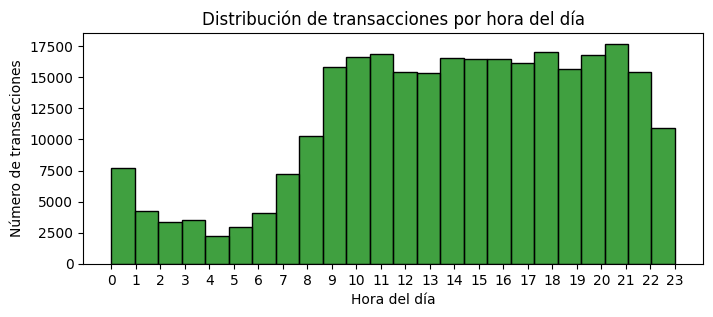

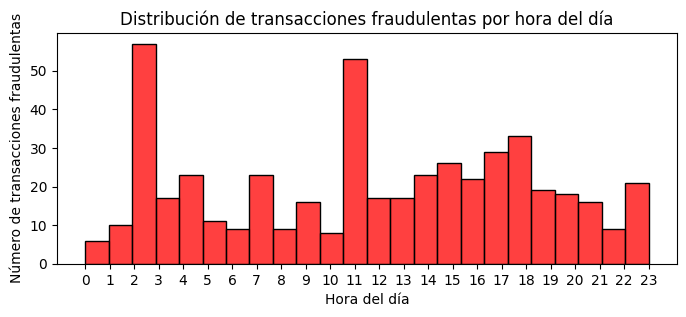

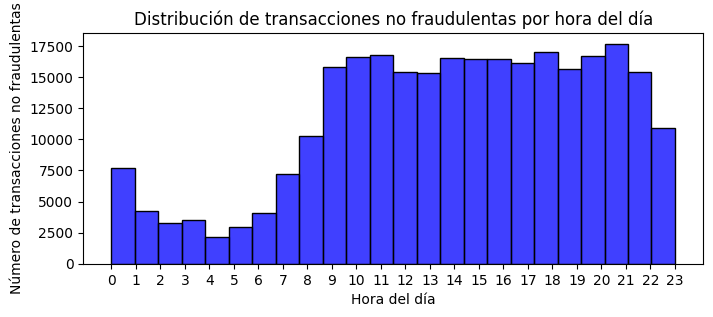

In [34]:
# Analisis de la variable Time
# Convertir el tiempo de segundos a horas
data['Hour'] = (data['Time'] // 3600) % 24

# Graficar el histograma de las transacciones por hora
plt.figure(figsize=(8, 3))
sns.histplot(data['Hour'], bins=24, kde=False, color='green')
plt.title('Distribución de transacciones por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de transacciones')
plt.xticks(range(24))  # Asegurarse de que las etiquetas del eje x sean las horas del día
plt.show()

# Graficar el histograma de las transacciones fraudulentas por hora
plt.figure(figsize=(8, 3))
sns.histplot(data[data['Class'] == 1]['Hour'], bins=24, kde=False, color='red')
plt.title('Distribución de transacciones fraudulentas por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de transacciones fraudulentas')
plt.xticks(range(24))
plt.show()

# Graficar el histograma de las transacciones no fraudulentas por hora
plt.figure(figsize=(8, 3))
sns.histplot(data[data['Class'] == 0]['Hour'], bins=24, kde=False, color='blue')
plt.title('Distribución de transacciones no fraudulentas por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de transacciones no fraudulentas')
plt.xticks(range(24))
plt.show()

data.drop(columns=['Hour'], inplace=True)


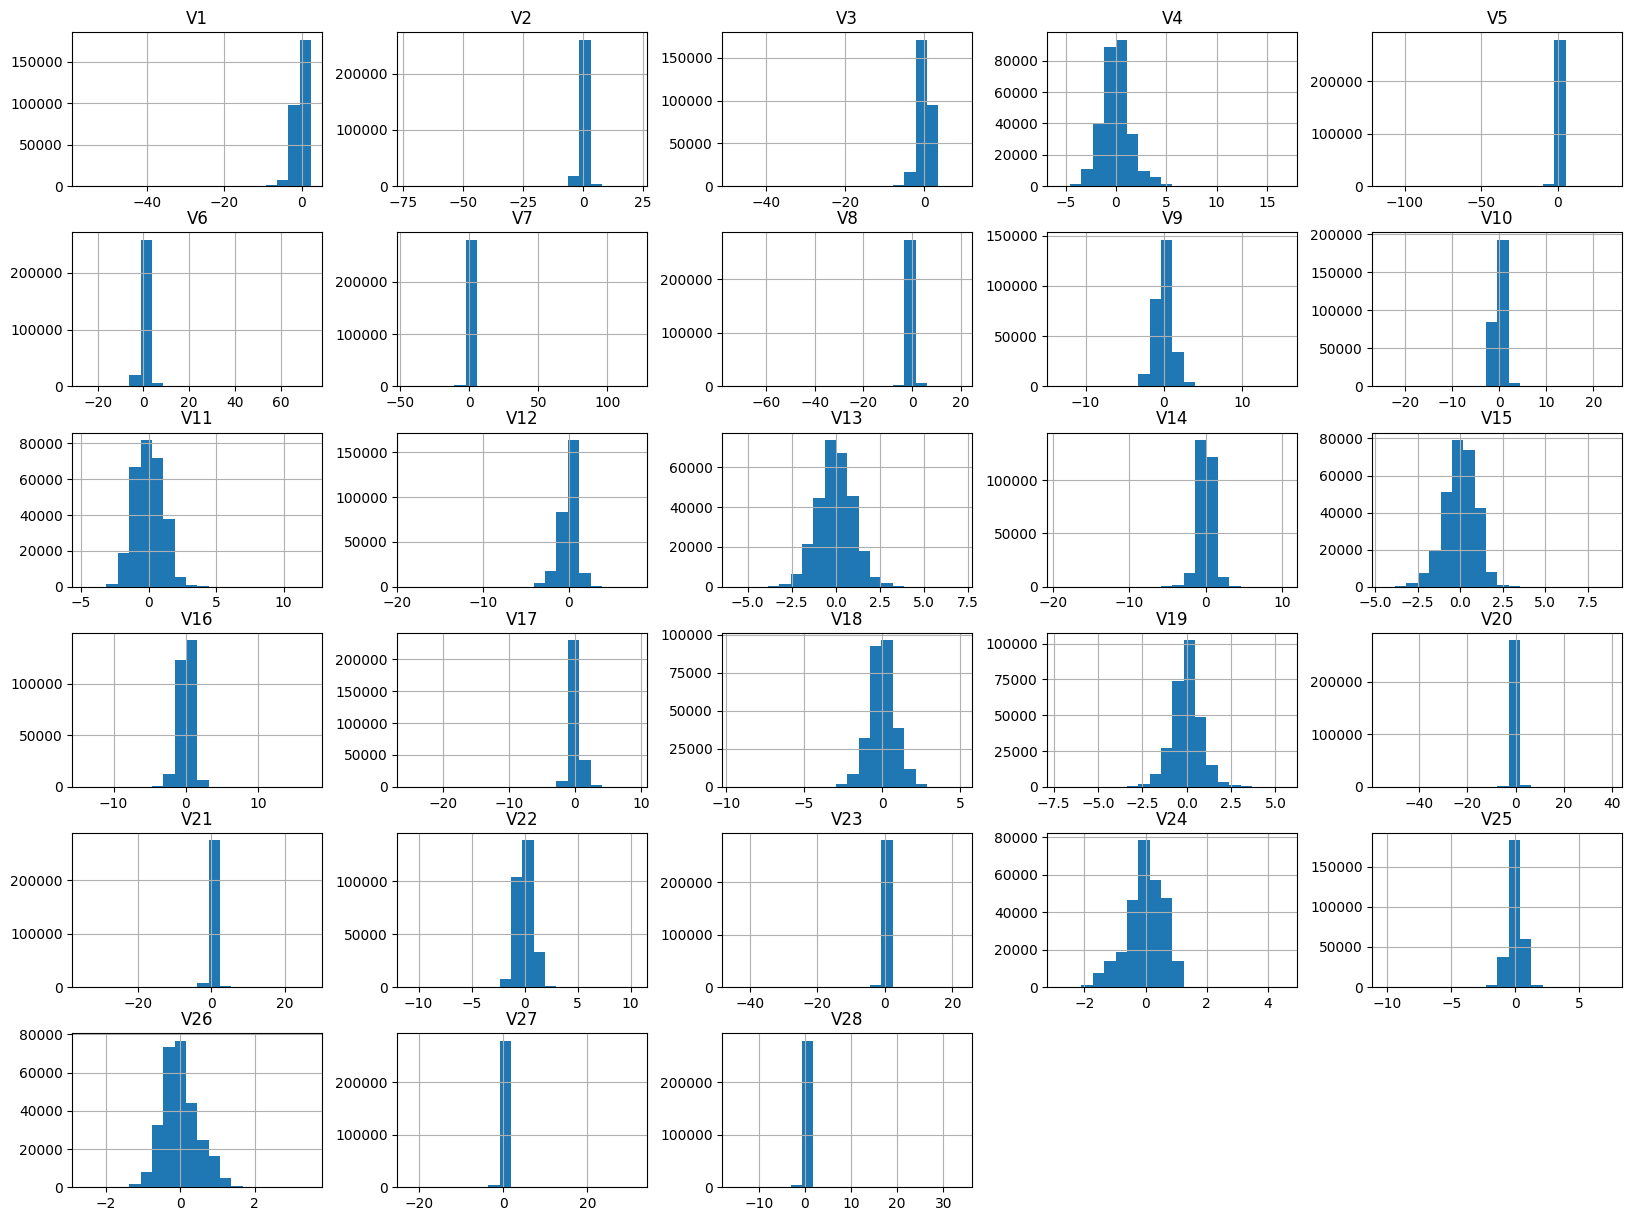

In [35]:
# Filtrar las columnas que no sean 'Class', 'Time' o 'Amount'
columnas_a_graficar = data.drop(columns=['Class', 'Time', 'Amount'])

# Crear el histograma
columnas_a_graficar.hist(bins=20, figsize=(20, 15))
plt.show()


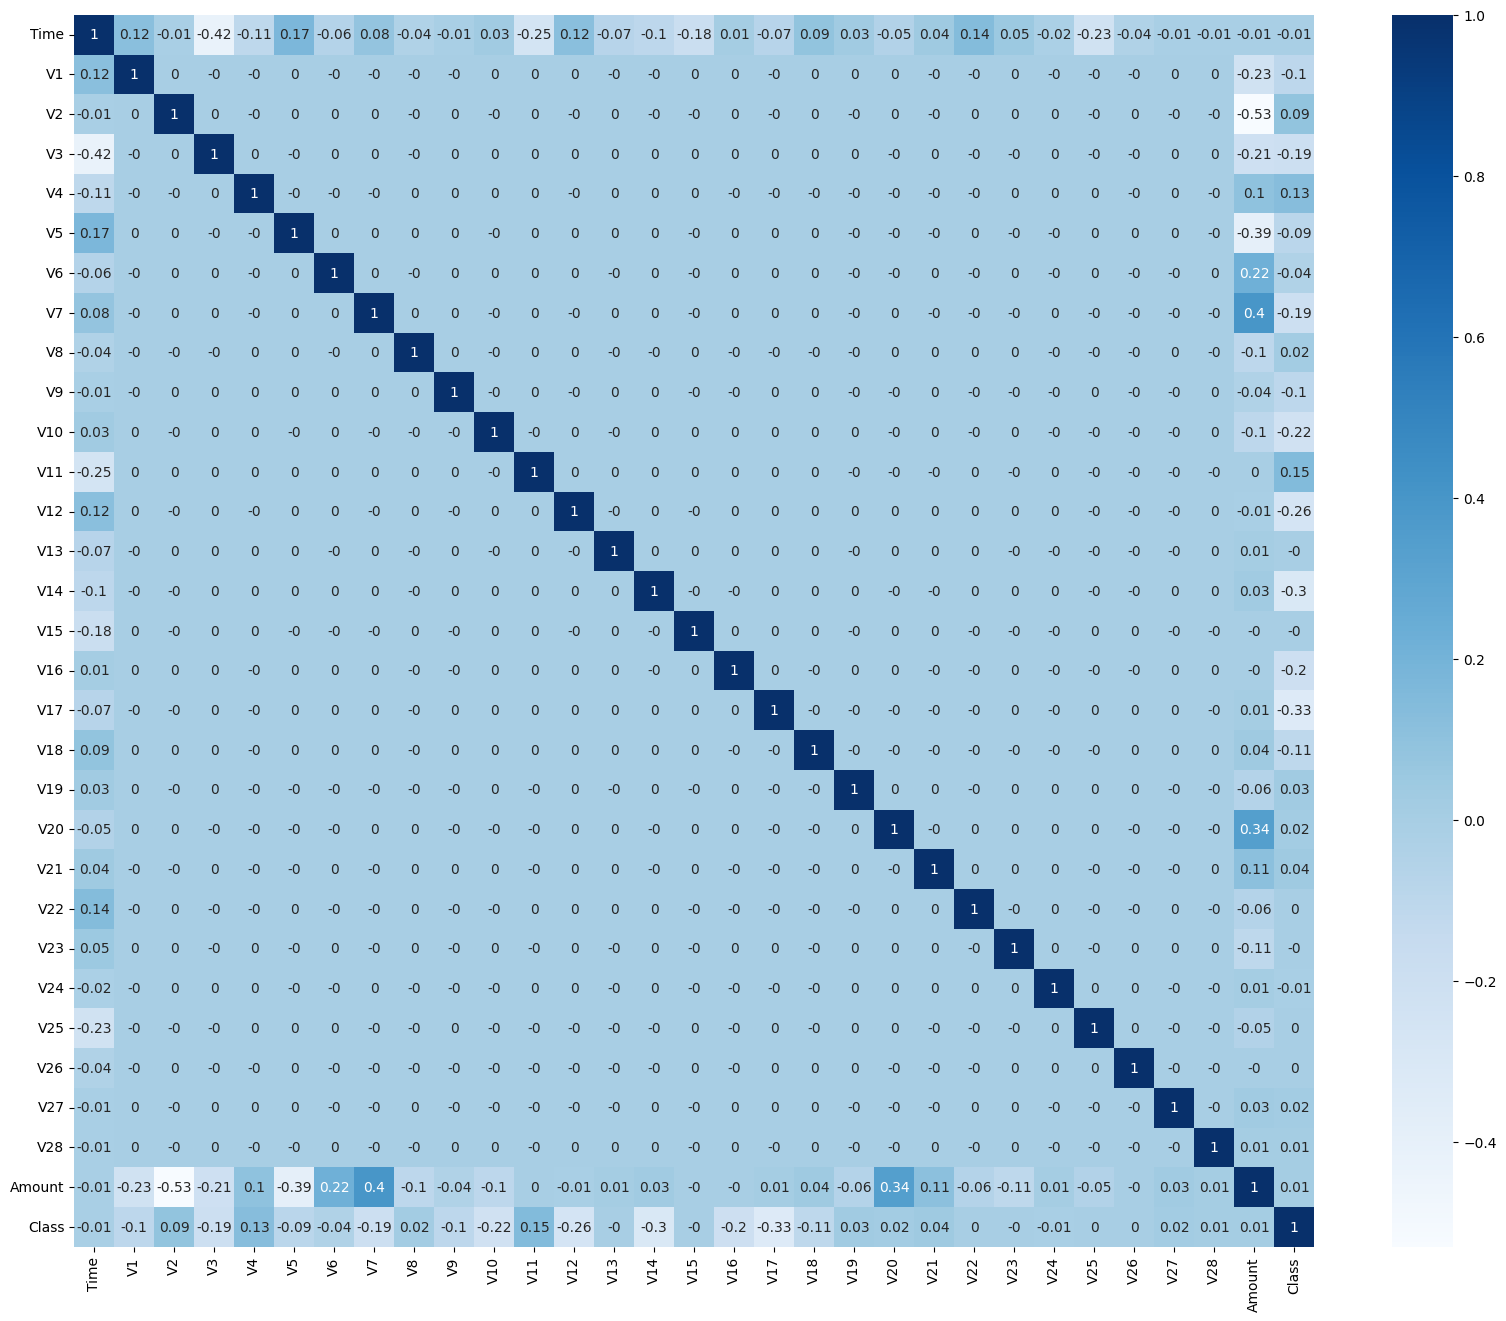

In [36]:

corr_matrix = data.corr().apply(lambda x: round(x,2))
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='Blues')
plt.show()


In [23]:
print(corr_matrix['Class'].sort_values(ascending=False))


Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


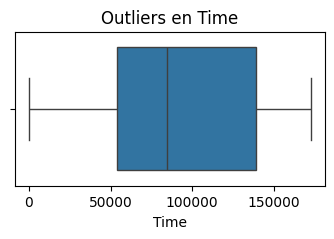

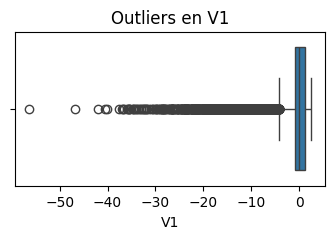

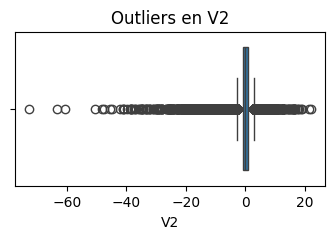

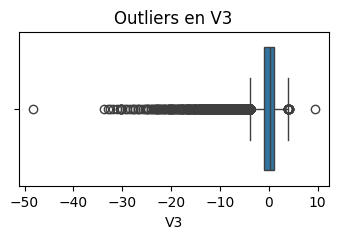

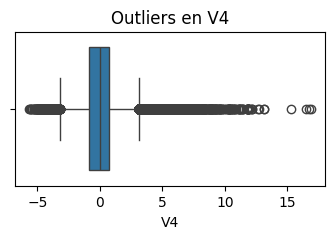

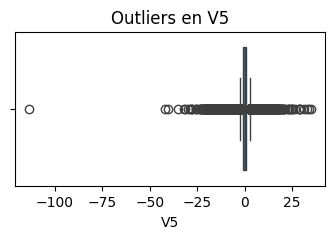

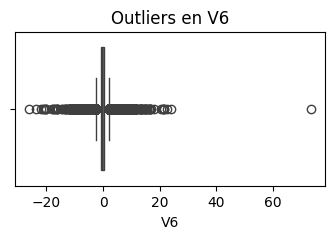

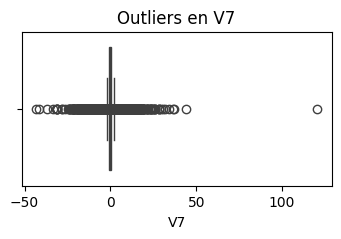

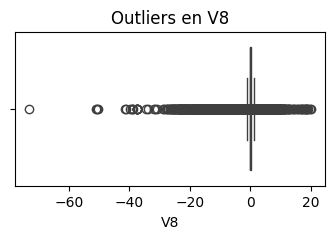

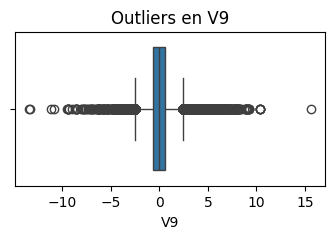

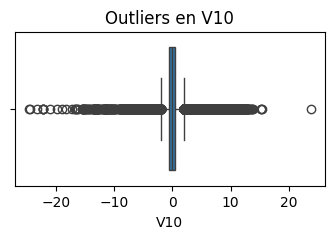

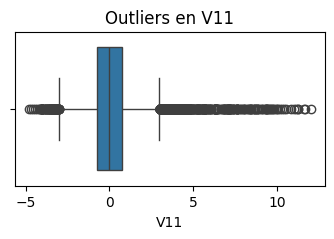

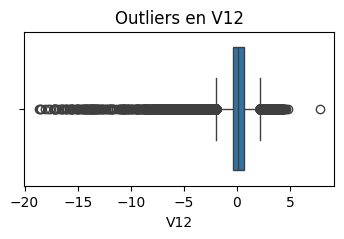

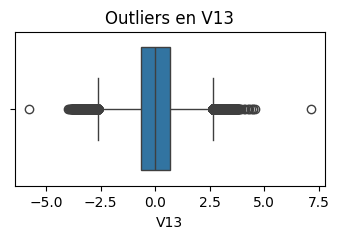

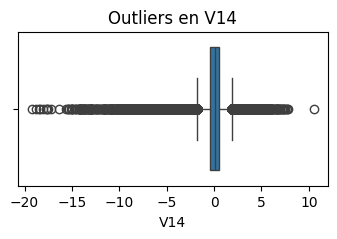

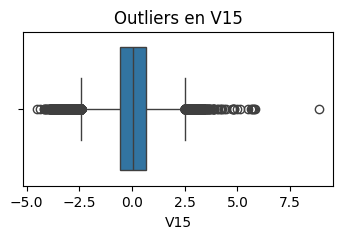

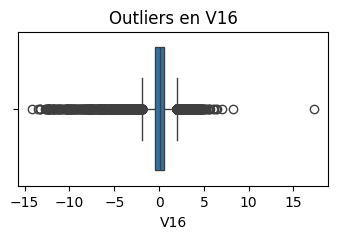

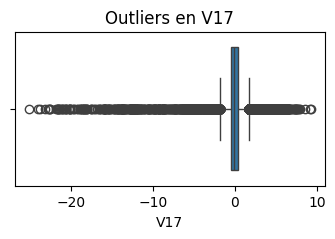

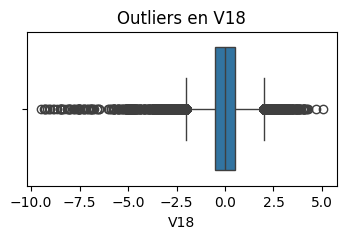

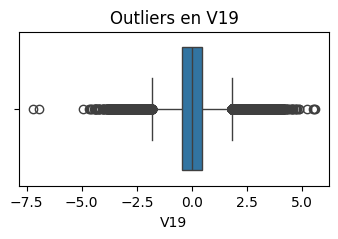

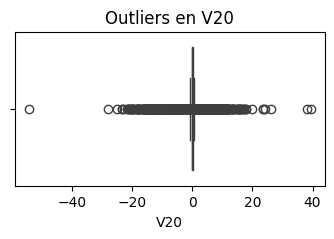

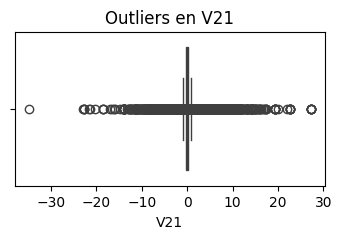

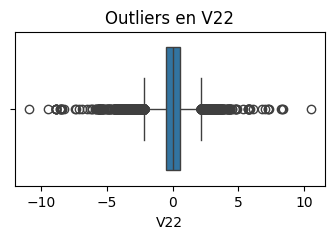

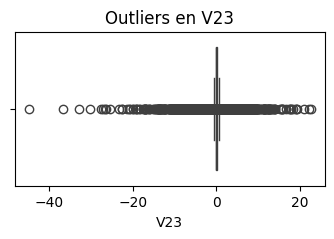

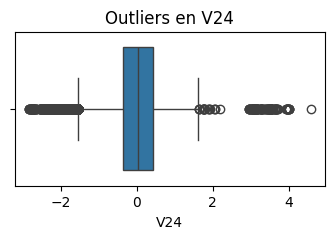

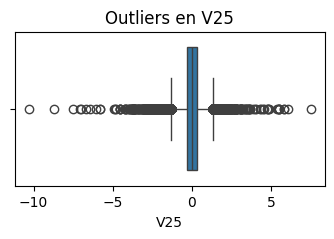

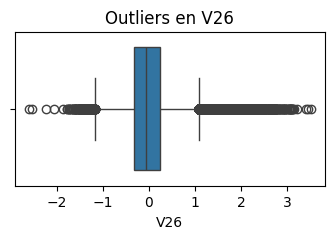

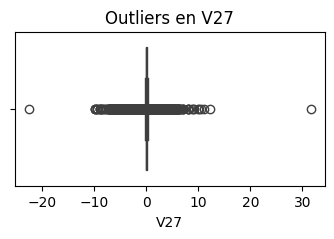

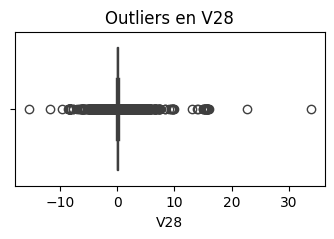

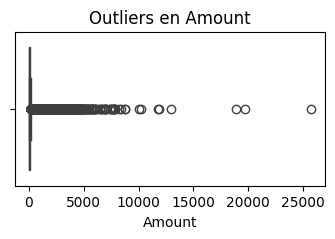

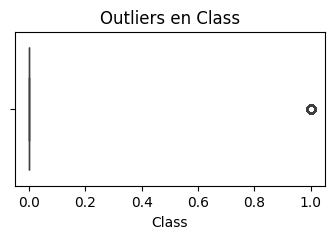

In [39]:
for column in data.columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=data[column])
    plt.title(f'Outliers en {column}')
    plt.show()
